In [1]:
#Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc,classification_report
from sklearn.model_selection import StratifiedKFold
from catboost import Pool
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc,log_loss
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sb.set_style("whitegrid")
np.random.seed(697)

In [2]:
#Import data
train = pd.read_csv('BootTrain.csv')
test = pd.read_csv('BootTest.csv')

In [3]:
print("train shape {} rows, {} columns".format(*train.shape))
print("test shape {} rows, {} columns".format(*test.shape))

train shape 56000 rows, 52 columns
test shape 24000 rows, 51 columns


In [4]:
train.head(10)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.0000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.0000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.2820,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.0000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.0000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
5,Apcnt_1000020,3724.0,NaN,0.0000,0.0,0.0000,192944.0,9244585.0,6761209.0,67963357.0,...,0.030558,12.12,0.382960,NaN,0.0,lending,NaN,0.000000,NaN,no
6,Apcnt_1000024,3350.0,0.24205,0.3132,0.0,2.8188,NaN,580388.0,NaN,96472.0,...,0.660000,1.01,0.513504,NaN,0.0,charge,NaN,2.146512,0.004390,yes
7,Apcnt_1000028,3416.0,0.87020,0.0570,0.0,0.0000,17505.0,186331.0,186331.0,1484813.0,...,0.137500,3.03,0.635960,NaN,0.0,charge,155.295994,0.946074,0.128389,no
8,Apcnt_1000036,3376.0,0.29180,0.5586,0.0,0.0000,18283.0,1105149.0,18283.0,115533.0,...,0.471427,4.04,0.410880,0.0,0.0,charge,NaN,0.641601,0.009990,no
9,Apcnt_1000040,3310.0,0.24395,0.1562,0.0,0.0000,NaN,0.0,NaN,NaN,...,0.825000,1.01,0.800000,NaN,NaN,charge,NaN,0.000000,NaN,yes


In [5]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
Applicant_ID      56000 non-null object
form_field1       53471 non-null float64
form_field2       52156 non-null float64
form_field3       55645 non-null float64
form_field4       55645 non-null float64
form_field5       55645 non-null float64
form_field6       42640 non-null float64
form_field7       50837 non-null float64
form_field8       42640 non-null float64
form_field9       47992 non-null float64
form_field10      55645 non-null float64
form_field11      24579 non-null float64
form_field12      46105 non-null float64
form_field13      50111 non-null float64
form_field14      56000 non-null int64
form_field15      33525 non-null float64
form_field16      42964 non-null float64
form_field17      44849 non-null float64
form_field18      45598 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field21      40146 non-null 

In [7]:
train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [8]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [9]:
test.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,22890.000000,22291.000000,23854.000000,23854.000000,23854.000000,1.839600e+04,2.176900e+04,1.839600e+04,2.060000e+04,2.385300e+04,...,5172.000000,7651.000000,23422.000000,23750.000000,21638.000000,10462.000000,17115.000000,1.507800e+04,23854.000000,1.920300e+04
mean,3492.284404,0.557676,1.065443,0.859146,2.183538,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,1.187478e+07,...,147.623280,108.209648,0.369684,6.580480,0.566219,0.066526,0.097926,3.015440e+05,1.064118,6.749843e+05
std,190.502764,0.826543,2.198444,3.403115,11.415706,1.457540e+06,1.626022e+07,3.968185e+06,2.289125e+07,2.477113e+07,...,43.580328,36.426276,0.414077,6.363075,0.196060,0.278211,0.370392,1.868574e+06,1.816837,6.561031e+06
min,2986.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.075000,0.000000,0.000000,0.000000,0.066432,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3356.000000,0.068675,0.000000,0.000000,0.000000,1.400400e+04,6.725810e+05,1.816630e+05,1.349441e+06,4.208980e+05,...,135.531750,87.499500,0.000000,2.020000,0.413268,0.000000,0.000000,7.272364e+01,0.000000,4.500510e-02
50%,3484.000000,0.273250,0.058200,0.000000,0.000000,1.155330e+05,2.719888e+06,9.594685e+05,5.529830e+06,3.651543e+06,...,150.000000,117.984000,0.220000,5.050000,0.592100,0.000000,0.000000,3.131754e+02,0.000000,1.680000e-01
75%,3624.000000,0.728850,1.304250,0.000000,0.000000,5.159112e+05,7.073576e+06,3.799849e+06,1.728658e+07,1.318126e+07,...,167.078250,137.207250,0.628573,10.100000,0.756544,0.000000,0.000000,1.195997e+03,1.254155,5.007093e-01
max,3900.000000,22.315050,34.541400,206.452800,297.885600,4.818738e+07,7.709887e+08,1.135141e+08,1.443921e+09,7.741014e+08,...,401.413500,211.693500,2.200000,91.910000,0.800000,5.000000,19.000000,1.213991e+08,24.000000,2.524591e+08


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 51 columns):
Applicant_ID    24000 non-null object
form_field1     22890 non-null float64
form_field2     22291 non-null float64
form_field3     23854 non-null float64
form_field4     23854 non-null float64
form_field5     23854 non-null float64
form_field6     18396 non-null float64
form_field7     21769 non-null float64
form_field8     18396 non-null float64
form_field9     20600 non-null float64
form_field10    23853 non-null float64
form_field11    10602 non-null float64
form_field12    19817 non-null float64
form_field13    21537 non-null float64
form_field14    24000 non-null int64
form_field15    14408 non-null float64
form_field16    18526 non-null float64
form_field17    19305 non-null float64
form_field18    19631 non-null float64
form_field19    24000 non-null float64
form_field20    23853 non-null float64
form_field21    17293 non-null float64
form_field22    15276 non-null float

In [11]:
test.isnull().sum()

Applicant_ID        0
form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field

# DATA VISUALIZATION

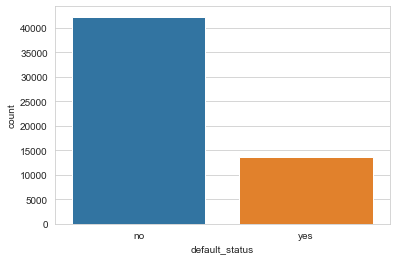

In [12]:
sb.countplot(train.default_status)

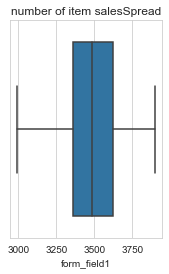

In [13]:
plt.subplot(1,2,2)
plt.title('number of item salesSpread')
sb.boxplot(x=train.form_field1)

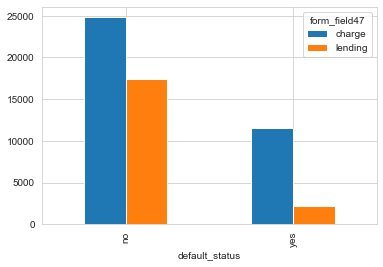

In [14]:
pd.crosstab(train.default_status,train.form_field47).plot(kind='bar')

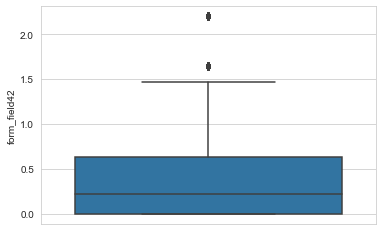

In [15]:
sb.boxplot(y=train.form_field42)

In [16]:
# train=train[train.columns[train.isnull().mean() < 0.8]]

In [17]:
lb=LabelEncoder()
train['default_status']=lb.fit_transform(train['default_status'])

In [18]:
# replacing the missing val by their median in the train data

int_var=train.select_dtypes(include=['float64','int64']).columns
for i in int_var:
#     print(i)
    train[i]=train[i].fillna(train[i].median())

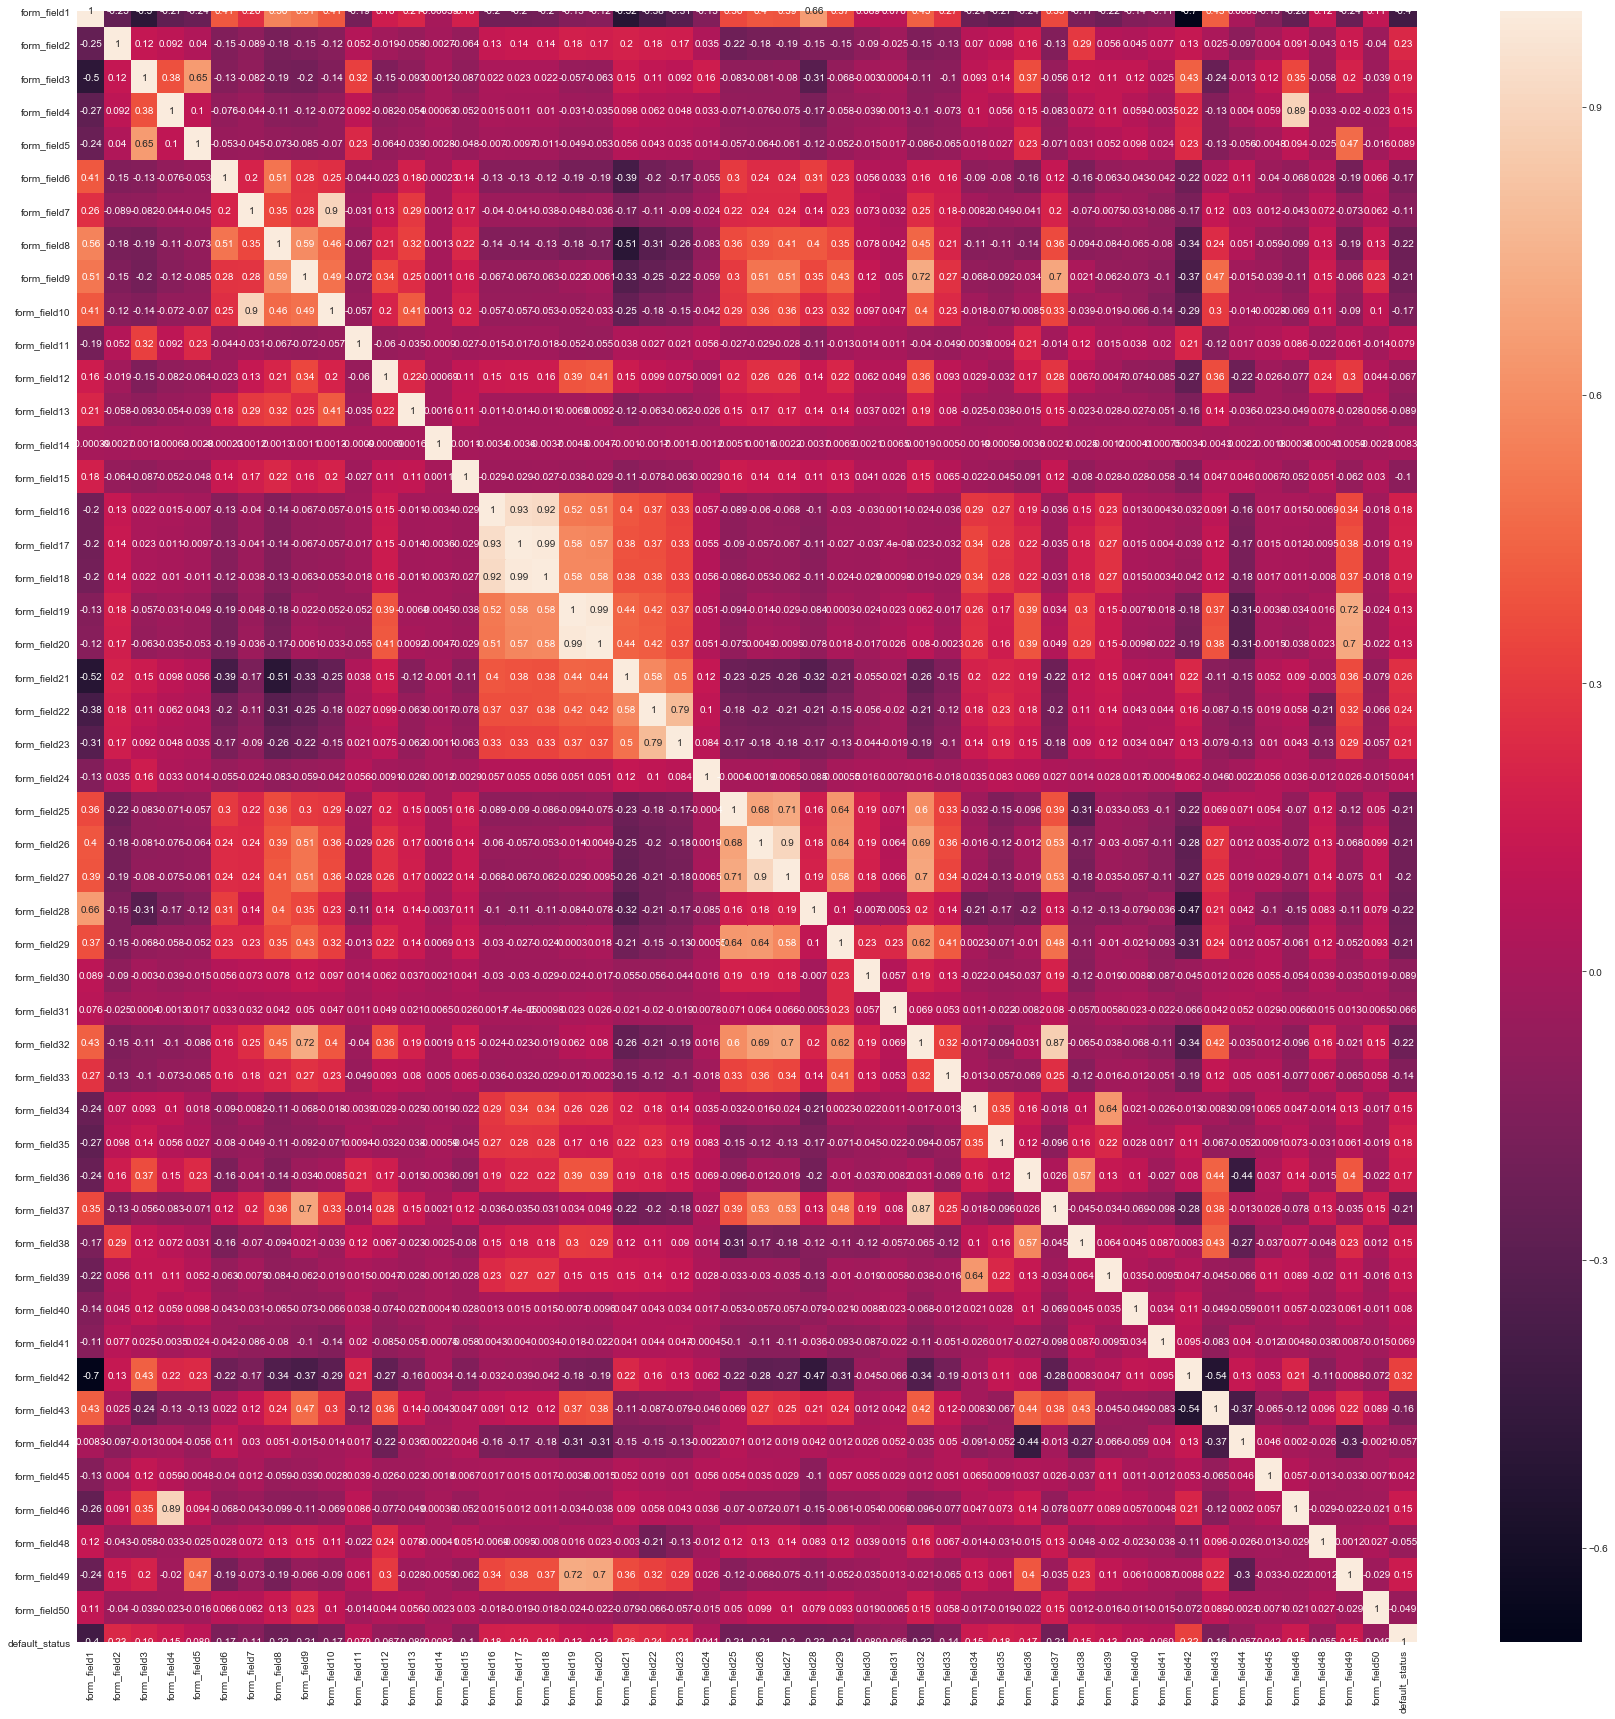

In [19]:
plt.figure(figsize=(30, 30))
sb.heatmap(train.corr(),annot=True)
plt.show()

In [20]:
(train.corr()**2)["default_status"].sort_values(ascending = False)[1:]

form_field1     0.161993
form_field42    0.104815
form_field21    0.068335
form_field22    0.057184
form_field2     0.051352
form_field8     0.048901
form_field28    0.048088
form_field32    0.046493
form_field23    0.044908
form_field9     0.044090
form_field37    0.043595
form_field29    0.043499
form_field25    0.043241
form_field26    0.042611
form_field27    0.040823
form_field3     0.037268
form_field17    0.034688
form_field18    0.034346
form_field16    0.033407
form_field35    0.032468
form_field10    0.028786
form_field6     0.027688
form_field36    0.027641
form_field43    0.026993
form_field49    0.023099
form_field38    0.022974
form_field34    0.022715
form_field46    0.021989
form_field4     0.021657
form_field33    0.019601
form_field19    0.018070
form_field39    0.016731
form_field20    0.016202
form_field7     0.013104
form_field15    0.011025
form_field13    0.007930
form_field30    0.007888
form_field5     0.007868
form_field40    0.006324
form_field11    0.006279


# FEATURE ENGINEERING

In [21]:
int_vars=test.select_dtypes(include=['float64','int64']).columns
for j in int_var:
#     print(i)
    test[j]=test[j].fillna(test[j].mean())

In [22]:
train

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,318.124292,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,0.0,0.0,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.282,115533.0,956940.0,963942.0,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,318.124292,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,0.0,0.0,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,Apcnt_999968,3740.0,0.01730,0.0000,0.0000,0.000,770998.0,9637475.0,4047934.0,11641992.0,...,0.000000,9.09,0.730040,0.0,0.0,lending,591.048913,0.000000,0.241598,0
55996,Apcnt_999972,3360.0,2.01145,0.6252,0.0000,0.000,115533.0,927765.0,963942.0,5506295.0,...,0.297913,30.30,0.498208,0.0,0.0,lending,318.124292,0.000000,0.170400,1
55997,Apcnt_999980,3500.0,0.76640,0.0000,0.0000,0.000,118645.0,3662435.0,3662435.0,3585024.0,...,0.550000,3.03,0.450512,0.0,0.0,lending,1252.474467,2.000000,0.163153,0
55998,Apcnt_999988,3280.0,0.05235,2.0916,2.2212,0.000,115533.0,3458599.0,963942.0,115533.0,...,0.942854,0.00,0.705048,1.0,0.0,charge,318.124292,0.000000,0.002997,0


In [23]:
test

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.000000,0.34875,10.2006,0.0000,0.0000,4.185640e+05,4.185640e+05,4.185640e+05,5.407100e+05,...,108.209648,0.825000,1.01,0.800000,0.066526,0.000000,charge,301544.001781,0.000000,0.011221
1,Apcnt_1000048,3284.000000,1.27360,2.9606,9.0198,0.0000,0.000000e+00,9.858816e+06,4.901400e+04,1.510098e+06,...,18.841500,0.507694,4.04,0.623248,1.000000,0.000000,lending,301544.001781,0.504974,0.043525
2,Apcnt_1000052,3492.284404,0.27505,0.0600,0.0000,0.0000,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,...,108.209648,0.369684,0.00,0.566219,0.066526,0.097926,charge,301544.001781,0.000000,674984.349339
3,Apcnt_1000076,3232.000000,0.28505,2.8032,0.0000,0.0000,0.000000e+00,4.738020e+05,4.738020e+05,1.724437e+06,...,108.209648,0.916663,2.02,0.464224,0.066526,0.097926,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.000000,2.09545,0.8318,2.5182,0.0000,1.983900e+04,1.150662e+06,1.150662e+06,7.860523e+06,...,108.209648,0.234047,23.23,0.726688,0.000000,0.000000,lending,1303.587148,1.637733,0.163124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Apcnt_999940,3258.000000,0.37925,0.5698,5.1282,0.0000,6.263036e+05,2.280318e+06,2.654142e+06,1.350593e+07,...,92.691000,1.100000,0.00,0.800000,0.066526,1.000000,charge,301544.001781,0.000000,674984.349339
23996,Apcnt_999956,3514.000000,0.95260,0.0000,0.0000,0.0000,1.494538e+06,4.773419e+06,4.773419e+06,8.971857e+07,...,125.022000,0.000000,12.12,0.196400,0.000000,0.000000,charge,4200.072959,3.000000,0.930931
23997,Apcnt_999976,3302.000000,0.05755,4.2394,0.0000,25.4376,6.263036e+05,4.940300e+04,2.654142e+06,1.350593e+07,...,108.209648,1.100000,1.01,0.800000,0.066526,0.000000,charge,301544.001781,4.855060,674984.349339
23998,Apcnt_999984,3334.000000,0.75670,1.4428,0.0000,0.0000,0.000000e+00,2.513329e+06,3.773300e+04,3.936680e+05,...,31.195500,0.440000,2.02,0.519776,0.066526,0.000000,charge,27.325129,0.818733,0.023749


In [24]:
X=train[train.columns.drop('default_status')]
y=train['default_status']

In [25]:
cat_c=train.select_dtypes(include=['object']).columns.drop('Applicant_ID')

In [26]:
cat_fet=np.where(X.dtypes !=np.float)[0]
cat_fet

array([ 0, 14, 47], dtype=int64)

In [27]:
def plot_roc_auc_curve(y_valid,y_pred):
    
    false_positive_rate, recall, thresholds = roc_curve(y_valid, y_pred)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure(figsize=((5,5)))
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()

In [28]:
def classification_result(y_valid,y_pred):
    
    cm = confusion_matrix(y_valid, y_pred)
    acc=accuracy_score(y_valid, y_pred)
    print("the accuracy is :",acc)
    print(cm)

# MODEL BUILDING 

--------------------------------------------------------------------------------------------------------------
Fold 1 of StratifiedKFold 10
Learning rate set to 0.083447
0:	test: 0.8005942	best: 0.8005942 (0)	total: 243ms	remaining: 4m 3s
200:	test: 0.8397614	best: 0.8400071 (173)	total: 18.8s	remaining: 1m 14s
400:	test: 0.8404249	best: 0.8404640 (388)	total: 37.3s	remaining: 55.8s
600:	test: 0.8390275	best: 0.8405592 (415)	total: 56.6s	remaining: 37.6s
800:	test: 0.8372372	best: 0.8405592 (415)	total: 1m 15s	remaining: 18.8s
999:	test: 0.8358315	best: 0.8405592 (415)	total: 1m 33s	remaining: 0us

bestTest = 0.8405592382
bestIteration = 415

Shrink model to first 416 iterations.
the accuracy is : 0.7967857142857143
[[3628  601]
 [ 537  834]]


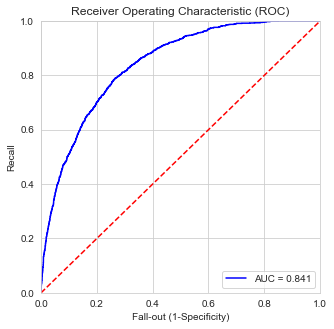

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 2 of StratifiedKFold 10
Learning rate set to 0.083447
0:	test: 0.8031694	best: 0.8031694 (0)	total: 115ms	remaining: 1m 54s
200:	test: 0.8530502	best: 0.8532121 (174)	total: 18.6s	remaining: 1m 13s
400:	test: 0.8522756	best: 0.8532121 (174)	total: 37.2s	remaining: 55.5s
600:	test: 0.8501645	best: 0.8532121 (174)	total: 56s	remaining: 37.2s
800:	test: 0.8499144	best: 0.8532121 (174)	total: 1m 18s	remaining: 19.5s
999:	test: 0.8479674	best: 0.8532121 (174)	total: 1m 37s	remaining: 0us

bestTest = 0.853212139
bestIteration = 174

Shrink model to first 175 iterations.
the accuracy is : 0.81125
[[3661  568]
 [ 489  882]]


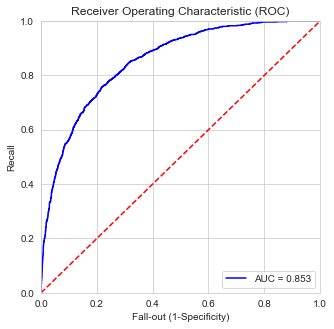

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 3 of StratifiedKFold 10
Learning rate set to 0.083447
0:	test: 0.7859725	best: 0.7859725 (0)	total: 124ms	remaining: 2m 4s
200:	test: 0.8394216	best: 0.8394482 (158)	total: 19.3s	remaining: 1m 16s
400:	test: 0.8401948	best: 0.8401948 (400)	total: 39.7s	remaining: 59.3s
600:	test: 0.8394463	best: 0.8403197 (430)	total: 58.7s	remaining: 39s
800:	test: 0.8384854	best: 0.8403197 (430)	total: 1m 18s	remaining: 19.4s
999:	test: 0.8374738	best: 0.8403197 (430)	total: 1m 36s	remaining: 0us

bestTest = 0.8403196711
bestIteration = 430

Shrink model to first 431 iterations.
the accuracy is : 0.7991071428571429
[[3643  586]
 [ 539  832]]


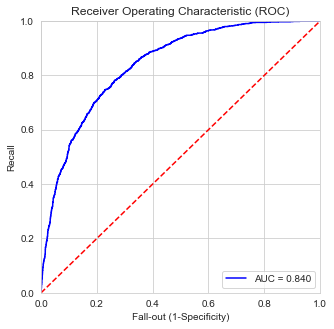

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 4 of StratifiedKFold 10
Learning rate set to 0.083447
0:	test: 0.7981870	best: 0.7981870 (0)	total: 227ms	remaining: 3m 46s
200:	test: 0.8389729	best: 0.8390712 (187)	total: 18.7s	remaining: 1m 14s
400:	test: 0.8387414	best: 0.8395571 (263)	total: 37.1s	remaining: 55.5s
600:	test: 0.8373802	best: 0.8395571 (263)	total: 55.6s	remaining: 36.9s
800:	test: 0.8359150	best: 0.8395571 (263)	total: 1m 14s	remaining: 18.5s
999:	test: 0.8342253	best: 0.8395571 (263)	total: 1m 32s	remaining: 0us

bestTest = 0.8395570752
bestIteration = 263

Shrink model to first 264 iterations.
the accuracy is : 0.7973214285714286
[[3644  585]
 [ 550  821]]


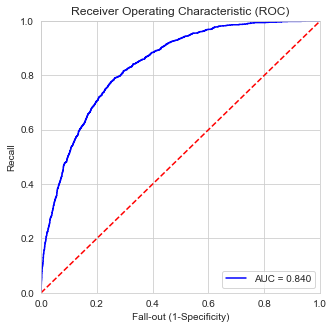

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 5 of StratifiedKFold 10
Learning rate set to 0.083447
0:	test: 0.7890525	best: 0.7890525 (0)	total: 114ms	remaining: 1m 53s
200:	test: 0.8322856	best: 0.8323955 (192)	total: 18.7s	remaining: 1m 14s
400:	test: 0.8317151	best: 0.8324247 (204)	total: 37s	remaining: 55.2s
600:	test: 0.8295447	best: 0.8324247 (204)	total: 56.7s	remaining: 37.7s
800:	test: 0.8288391	best: 0.8324247 (204)	total: 1m 16s	remaining: 19s
999:	test: 0.8271637	best: 0.8324247 (204)	total: 1m 35s	remaining: 0us

bestTest = 0.8324246515
bestIteration = 204

Shrink model to first 205 iterations.
the accuracy is : 0.7876785714285715
[[3571  658]
 [ 531  840]]


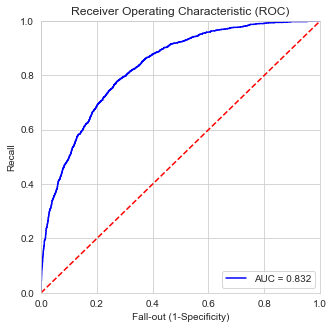

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 6 of StratifiedKFold 10
Learning rate set to 0.083447
0:	test: 0.7864391	best: 0.7864391 (0)	total: 251ms	remaining: 4m 11s
200:	test: 0.8317263	best: 0.8317263 (200)	total: 20.3s	remaining: 1m 20s
400:	test: 0.8311825	best: 0.8320674 (218)	total: 39.7s	remaining: 59.3s
600:	test: 0.8302404	best: 0.8320674 (218)	total: 58.5s	remaining: 38.9s
800:	test: 0.8282919	best: 0.8320674 (218)	total: 1m 17s	remaining: 19.4s
999:	test: 0.8274293	best: 0.8320674 (218)	total: 1m 36s	remaining: 0us

bestTest = 0.8320674195
bestIteration = 218

Shrink model to first 219 iterations.
the accuracy is : 0.7880357142857143
[[3585  643]
 [ 544  828]]


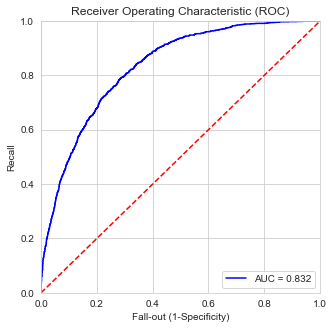

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 7 of StratifiedKFold 10
Learning rate set to 0.083447
0:	test: 0.7853275	best: 0.7853275 (0)	total: 120ms	remaining: 1m 59s
200:	test: 0.8355759	best: 0.8355759 (200)	total: 19.2s	remaining: 1m 16s
400:	test: 0.8351296	best: 0.8358398 (224)	total: 38s	remaining: 56.7s
600:	test: 0.8349798	best: 0.8360031 (491)	total: 57.3s	remaining: 38s
800:	test: 0.8329390	best: 0.8360031 (491)	total: 1m 16s	remaining: 19s
999:	test: 0.8320698	best: 0.8360031 (491)	total: 1m 36s	remaining: 0us

bestTest = 0.8360030727
bestIteration = 491

Shrink model to first 492 iterations.
the accuracy is : 0.7946428571428571
[[3620  608]
 [ 542  830]]


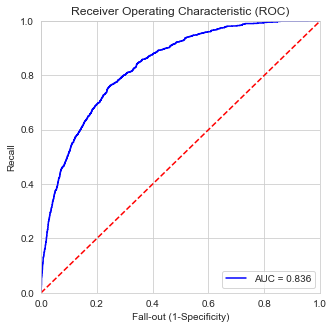

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 8 of StratifiedKFold 10
Learning rate set to 0.083447
0:	test: 0.7906672	best: 0.7906672 (0)	total: 118ms	remaining: 1m 58s
200:	test: 0.8350995	best: 0.8351395 (198)	total: 19s	remaining: 1m 15s
400:	test: 0.8347804	best: 0.8355443 (302)	total: 38s	remaining: 56.8s
600:	test: 0.8339316	best: 0.8355443 (302)	total: 57.2s	remaining: 37.9s
800:	test: 0.8325519	best: 0.8355443 (302)	total: 1m 16s	remaining: 19s
999:	test: 0.8320129	best: 0.8355443 (302)	total: 1m 35s	remaining: 0us

bestTest = 0.8355442579
bestIteration = 302

Shrink model to first 303 iterations.
the accuracy is : 0.7946428571428571
[[3590  638]
 [ 512  860]]


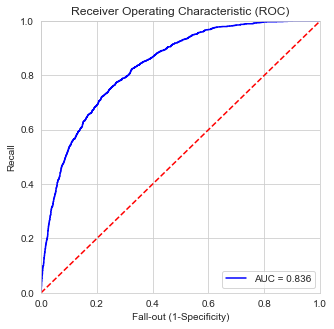

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 9 of StratifiedKFold 10
Learning rate set to 0.083447
0:	test: 0.8042284	best: 0.8042284 (0)	total: 238ms	remaining: 3m 57s
200:	test: 0.8384374	best: 0.8384374 (200)	total: 19.6s	remaining: 1m 18s
400:	test: 0.8382998	best: 0.8390480 (315)	total: 38.6s	remaining: 57.7s
600:	test: 0.8375030	best: 0.8390480 (315)	total: 57.9s	remaining: 38.4s
800:	test: 0.8363949	best: 0.8390480 (315)	total: 1m 16s	remaining: 19.1s
999:	test: 0.8351499	best: 0.8390480 (315)	total: 1m 35s	remaining: 0us

bestTest = 0.8390479891
bestIteration = 315

Shrink model to first 316 iterations.
the accuracy is : 0.79625
[[3618  610]
 [ 531  841]]


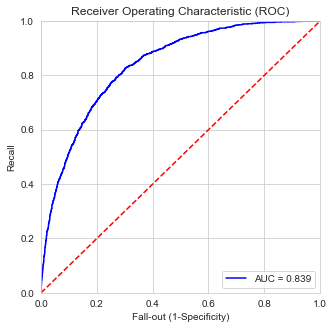

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 10 of StratifiedKFold 10
Learning rate set to 0.083447
0:	test: 0.7966544	best: 0.7966544 (0)	total: 114ms	remaining: 1m 53s
200:	test: 0.8386860	best: 0.8387130 (198)	total: 19s	remaining: 1m 15s
400:	test: 0.8387813	best: 0.8389223 (235)	total: 38s	remaining: 56.7s
600:	test: 0.8381176	best: 0.8391138 (431)	total: 57.3s	remaining: 38s
800:	test: 0.8375696	best: 0.8391138 (431)	total: 1m 16s	remaining: 19s
999:	test: 0.8366549	best: 0.8391138 (431)	total: 1m 35s	remaining: 0us

bestTest = 0.8391138419
bestIteration = 431

Shrink model to first 432 iterations.
the accuracy is : 0.7919642857142857
[[3596  632]
 [ 533  839]]


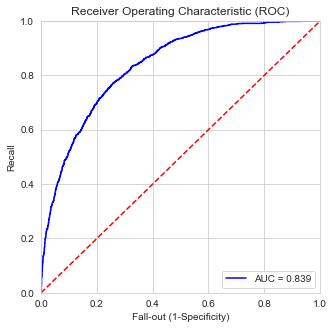

--------------------------------------------------------------------------------------------------------------
CV mean: 0.8388, CV std: 0.0056
Wall time: 16min 10s


In [30]:
%%time


SEED=1

n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=SEED)

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed': SEED,

         }

test_data = Pool(data=test,
                 cat_features=cat_fet)
scores = []
prediction = np.zeros(test.shape[0])

i=1
for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):

    print("--------------------------------------------------------------------------------------------------------------")
    print('Fold {} of StratifiedKFold {}'.format(i,folds.n_splits))

    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] # train and validation data splits
    y_train, y_valid = y[train_index], y[valid_index]
    

    
    train_data = Pool(data=X_train, 
                      label=y_train,
                      cat_features=cat_fet)
    valid_data = Pool(data=X_valid, 
                      label=y_valid,
                      cat_features=cat_fet)

    model = CatBoostClassifier(**params)
    model.fit(train_data,
              eval_set=valid_data, 
              use_best_model=True
             )
    y_predb = model.predict_proba(X_valid)[:,1]
    y_pred=np.where(y_predb>0.5,1,0)

    classification_result(y_valid,y_pred)
    plot_roc_auc_curve(y_valid,y_predb)


    score = model.get_best_score()['validation']['AUC']
    scores.append(score)


    preds = model.predict_proba(test_data)[:,1]
    prediction += preds


    i+=1

    print("--------------------------------------------------------------------------------------------------------------")

prediction /= n_fold
print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))



In [31]:
scores

[0.8405592381732951,
 0.8532121389613138,
 0.8403196711118516,
 0.8395570751707626,
 0.8324246515023649,
 0.8320674194802938,
 0.8360030726711553,
 0.8355442579113007,
 0.8390479891104976,
 0.8391138419146548]

In [33]:
prediction

array([0.42049351, 0.48156699, 0.11873588, ..., 0.26711131, 0.62251447,
       0.18484661])

In [34]:
# final_y=np.where(prediction>0.5,1,0)
submission = pd.DataFrame({"Applicant_ID":test['Applicant_ID'],
    "default_status":prediction})
submission.to_csv("subboot27.csv", index=False)

In [35]:
feature_importance_df = pd.DataFrame(model.get_feature_importance(prettified=True),columns=['Feature Id','Importances'])
feature_importance_df

,Feature Id,Importances
0,form_field1,10.120733
1,form_field47,8.360075
2,form_field2,5.463948
3,form_field6,4.576395
4,form_field24,2.998436
5,form_field37,2.893503
6,form_field42,2.610161
7,form_field13,2.457935
8,form_field25,2.452734
9,form_field7,2.434926


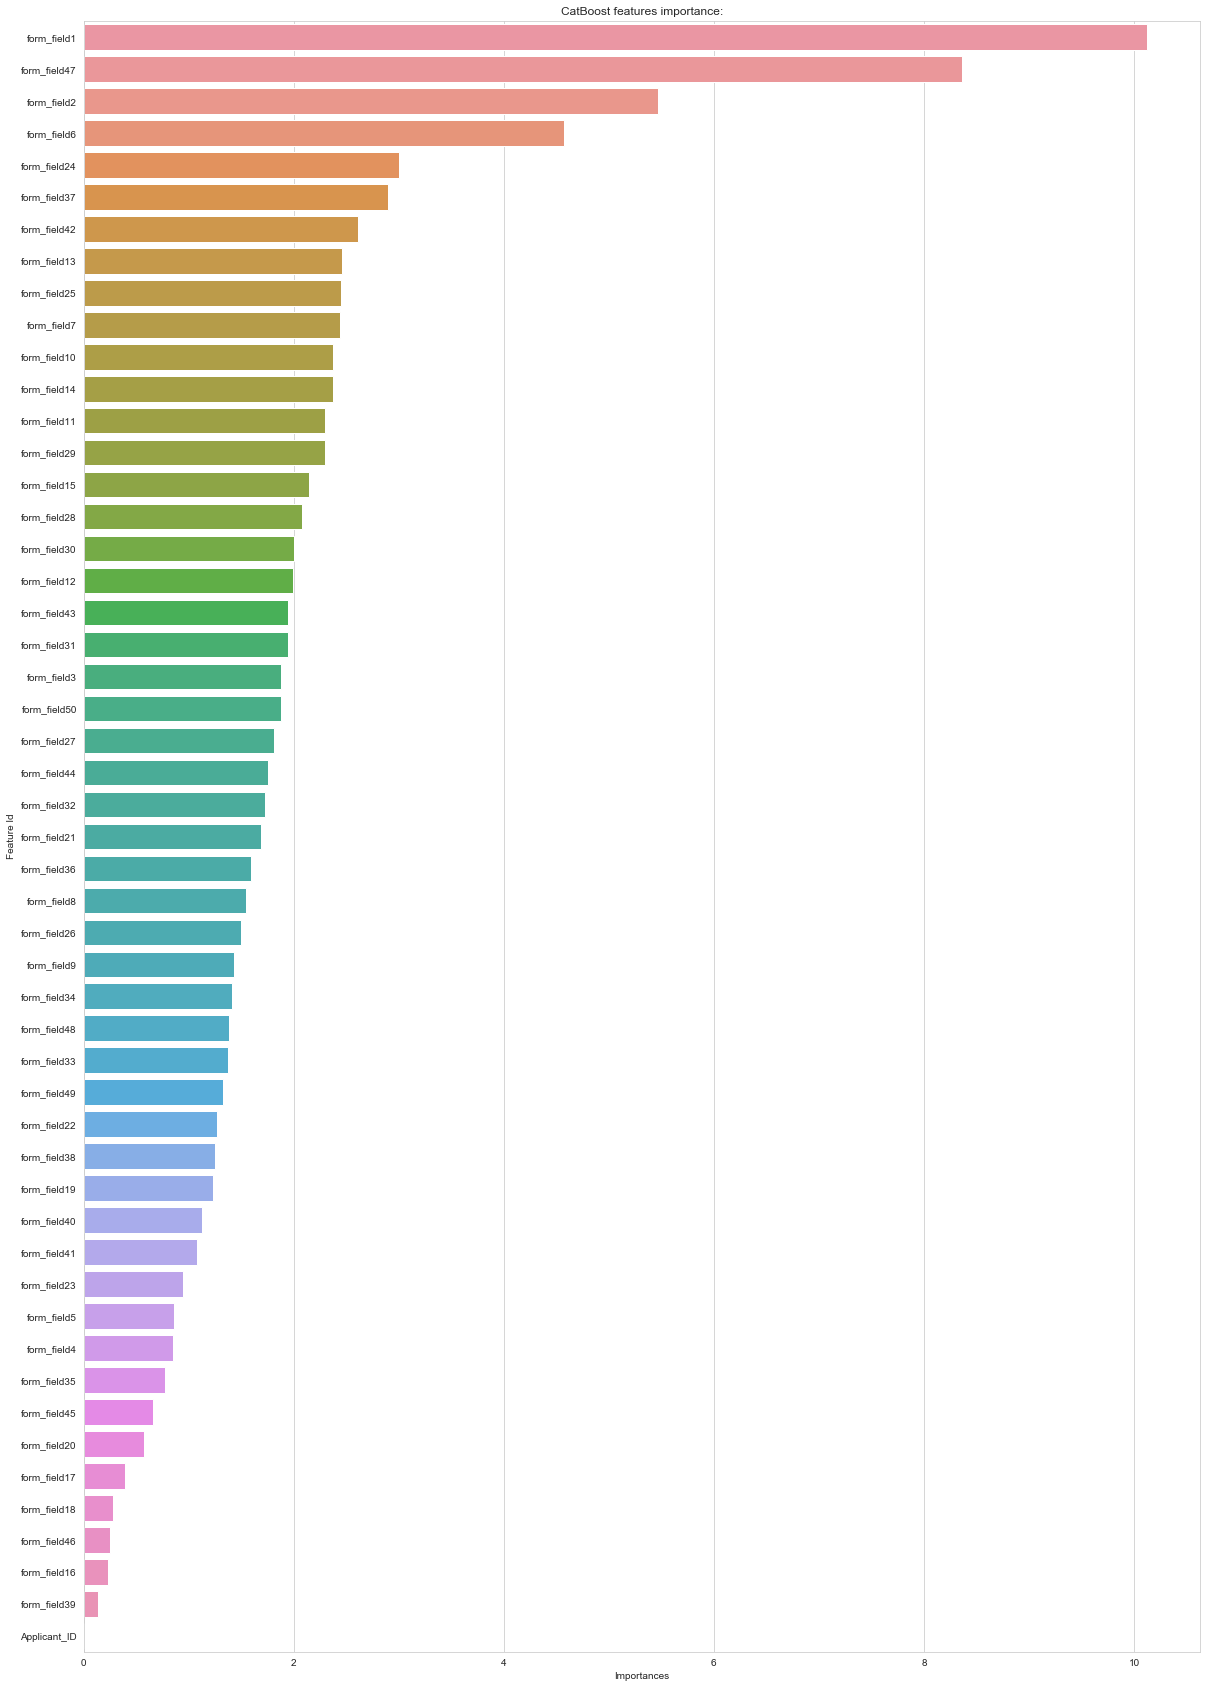

In [36]:

plt.figure(figsize=(20, 30));
sb.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost features importance:');

# FEATURE SELECTION

In [37]:
df_reject=train[feature_importance_df.loc[feature_importance_df['Importances']<1.0]['Feature Id']]

In [38]:
df_reject.columns.drop("Applicant_ID")

Index(['form_field23', 'form_field5', 'form_field4', 'form_field35',
       'form_field45', 'form_field20', 'form_field17', 'form_field18',
       'form_field46', 'form_field16', 'form_field39'],
      dtype='object')

In [39]:
train=train[train.columns.drop(df_reject.columns.drop("Applicant_ID"))]

In [40]:
train

,Applicant_ID,form_field1,form_field2,form_field3,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,...,150.0000,118.4415,0.392854,2.02,0.711632,charge,318.124292,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,...,150.0000,118.4415,0.314281,8.08,0.183584,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,115533.0,956940.0,963942.0,192944.0,1079864.0,698644.0,...,149.6805,118.4415,0.162965,18.18,0.791136,charge,318.124292,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,192166.0,3044703.0,385499.0,3986472.0,3621979.0,698644.0,...,150.0000,118.4415,0.488884,2.02,0.685168,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,...,150.0135,118.4415,0.275000,12.12,0.438168,charge,97.887502,1.427891,0.045630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,Apcnt_999968,3740.0,0.01730,0.0000,770998.0,9637475.0,4047934.0,11641992.0,19910965.0,698644.0,...,150.0000,118.4415,0.000000,9.09,0.730040,lending,591.048913,0.000000,0.241598,0
55996,Apcnt_999972,3360.0,2.01145,0.6252,115533.0,927765.0,963942.0,5506295.0,1849306.0,571052.0,...,158.0250,136.5135,0.297913,30.30,0.498208,lending,318.124292,0.000000,0.170400,1
55997,Apcnt_999980,3500.0,0.76640,0.0000,118645.0,3662435.0,3662435.0,3585024.0,704090.0,698644.0,...,150.0000,118.4415,0.550000,3.03,0.450512,lending,1252.474467,2.000000,0.163153,0
55998,Apcnt_999988,3280.0,0.05235,2.0916,115533.0,3458599.0,963942.0,115533.0,3458599.0,508812.0,...,150.0000,150.0000,0.942854,0.00,0.705048,charge,318.124292,0.000000,0.002997,0


In [41]:
test=test[test.columns.drop(df_reject.columns.drop("Applicant_ID"))]
test

,Applicant_ID,form_field1,form_field2,form_field3,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,...,form_field38,form_field40,form_field41,form_field42,form_field43,form_field44,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.000000,0.34875,10.2006,4.185640e+05,4.185640e+05,4.185640e+05,5.407100e+05,0.0,1.649749e+06,...,14.0,147.62328,108.209648,0.825000,1.01,0.800000,charge,301544.001781,0.000000,0.011221
1,Apcnt_1000048,3284.000000,1.27360,2.9606,0.000000e+00,9.858816e+06,4.901400e+04,1.510098e+06,18308285.0,6.227890e+05,...,14.0,147.62328,18.841500,0.507694,4.04,0.623248,lending,301544.001781,0.504974,0.043525
2,Apcnt_1000052,3492.284404,0.27505,0.0600,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,0.0,1.182560e+05,...,0.0,147.62328,108.209648,0.369684,0.00,0.566219,charge,301544.001781,0.000000,674984.349339
3,Apcnt_1000076,3232.000000,0.28505,2.8032,0.000000e+00,4.738020e+05,4.738020e+05,1.724437e+06,493641.0,1.391064e+06,...,26.0,147.62328,108.209648,0.916663,2.02,0.464224,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.000000,2.09545,0.8318,1.983900e+04,1.150662e+06,1.150662e+06,7.860523e+06,5752921.0,2.711330e+05,...,20.0,147.62328,108.209648,0.234047,23.23,0.726688,lending,1303.587148,1.637733,0.163124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Apcnt_999940,3258.000000,0.37925,0.5698,6.263036e+05,2.280318e+06,2.654142e+06,1.350593e+07,2280318.0,1.743887e+06,...,6.0,147.62328,92.691000,1.100000,0.00,0.800000,charge,301544.001781,0.000000,674984.349339
23996,Apcnt_999956,3514.000000,0.95260,0.0000,1.494538e+06,4.773419e+06,4.773419e+06,8.971857e+07,12999991.0,2.132302e+06,...,8.0,147.62328,125.022000,0.000000,12.12,0.196400,charge,4200.072959,3.000000,0.930931
23997,Apcnt_999976,3302.000000,0.05755,4.2394,6.263036e+05,4.940300e+04,2.654142e+06,1.350593e+07,49403.0,2.158950e+05,...,2.0,147.62328,108.209648,1.100000,1.01,0.800000,charge,301544.001781,4.855060,674984.349339
23998,Apcnt_999984,3334.000000,0.75670,1.4428,0.000000e+00,2.513329e+06,3.773300e+04,3.936680e+05,2551062.0,1.217570e+05,...,4.0,147.62328,31.195500,0.440000,2.02,0.519776,charge,27.325129,0.818733,0.023749


In [42]:
X=train[train.columns.drop('default_status')]
y=train['default_status']
cat_fet=np.where(X.dtypes !=np.float)[0]

--------------------------------------------------------------------------------------------------------------
Fold 1 of StratifiedKFold 5
Learning rate set to 0.081054
0:	test: 0.7926268	best: 0.7926268 (0)	total: 119ms	remaining: 1m 59s
200:	test: 0.8437450	best: 0.8439015 (190)	total: 19.6s	remaining: 1m 18s
400:	test: 0.8423834	best: 0.8439015 (190)	total: 39.7s	remaining: 59.2s
600:	test: 0.8414754	best: 0.8439015 (190)	total: 59.6s	remaining: 39.6s
800:	test: 0.8398700	best: 0.8439015 (190)	total: 1m 20s	remaining: 19.9s
999:	test: 0.8386940	best: 0.8439015 (190)	total: 1m 38s	remaining: 0us

bestTest = 0.8439015394
bestIteration = 190

Shrink model to first 191 iterations.
the accuracy is : 0.7492857142857143
[[6238 2219]
 [ 589 2154]]


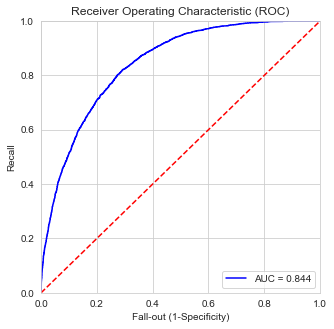

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 2 of StratifiedKFold 5
Learning rate set to 0.081054
0:	test: 0.7790046	best: 0.7790046 (0)	total: 116ms	remaining: 1m 55s
200:	test: 0.8265448	best: 0.8266007 (189)	total: 19.5s	remaining: 1m 17s
400:	test: 0.8265402	best: 0.8266269 (228)	total: 39.2s	remaining: 58.5s
600:	test: 0.8260362	best: 0.8266269 (228)	total: 58.3s	remaining: 38.7s
800:	test: 0.8247976	best: 0.8266269 (228)	total: 1m 17s	remaining: 19.1s
999:	test: 0.8244213	best: 0.8266269 (228)	total: 1m 36s	remaining: 0us

bestTest = 0.8266268711
bestIteration = 228

Shrink model to first 229 iterations.
the accuracy is : 0.734375
[[6127 2330]
 [ 645 2098]]


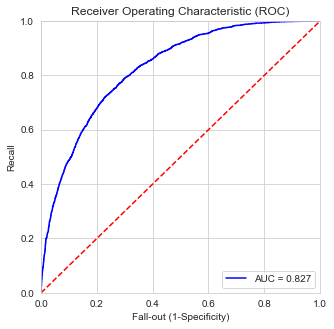

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 3 of StratifiedKFold 5
Learning rate set to 0.081054
0:	test: 0.7874982	best: 0.7874982 (0)	total: 122ms	remaining: 2m 1s
200:	test: 0.8342274	best: 0.8343003 (194)	total: 19.5s	remaining: 1m 17s
400:	test: 0.8337722	best: 0.8345234 (284)	total: 38.3s	remaining: 57.2s
600:	test: 0.8315594	best: 0.8345234 (284)	total: 57.5s	remaining: 38.2s
800:	test: 0.8294517	best: 0.8345234 (284)	total: 1m 17s	remaining: 19.2s
999:	test: 0.8280408	best: 0.8345234 (284)	total: 1m 36s	remaining: 0us

bestTest = 0.8345233512
bestIteration = 284

Shrink model to first 285 iterations.
the accuracy is : 0.7407142857142858
[[6184 2273]
 [ 631 2112]]


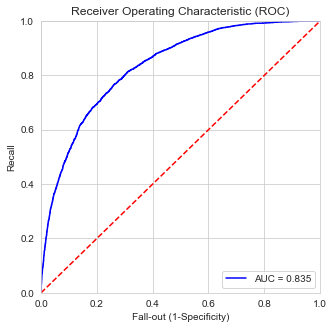

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 4 of StratifiedKFold 5
Learning rate set to 0.081054
0:	test: 0.7929975	best: 0.7929975 (0)	total: 151ms	remaining: 2m 30s
200:	test: 0.8414070	best: 0.8417939 (183)	total: 19.1s	remaining: 1m 15s
400:	test: 0.8409640	best: 0.8417939 (183)	total: 37.6s	remaining: 56.2s
600:	test: 0.8381749	best: 0.8417939 (183)	total: 56.8s	remaining: 37.7s
800:	test: 0.8363838	best: 0.8417939 (183)	total: 1m 15s	remaining: 18.8s
999:	test: 0.8346178	best: 0.8417939 (183)	total: 1m 34s	remaining: 0us

bestTest = 0.8417938816
bestIteration = 183

Shrink model to first 184 iterations.
the accuracy is : 0.7442857142857143
[[6169 2288]
 [ 576 2167]]


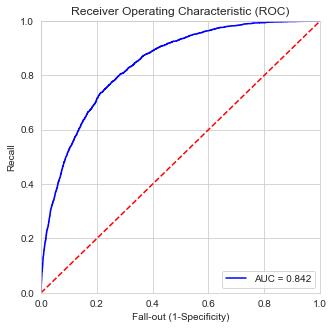

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Fold 5 of StratifiedKFold 5
Learning rate set to 0.081054
0:	test: 0.7858703	best: 0.7858703 (0)	total: 121ms	remaining: 2m
200:	test: 0.8344312	best: 0.8344312 (200)	total: 19.1s	remaining: 1m 15s
400:	test: 0.8341302	best: 0.8350549 (269)	total: 38.2s	remaining: 57.1s
600:	test: 0.8322985	best: 0.8350549 (269)	total: 57.9s	remaining: 38.4s
800:	test: 0.8317624	best: 0.8350549 (269)	total: 1m 17s	remaining: 19.2s
999:	test: 0.8305513	best: 0.8350549 (269)	total: 1m 36s	remaining: 0us

bestTest = 0.8350548728
bestIteration = 269

Shrink model to first 270 iterations.
the accuracy is : 0.7449107142857143
[[6242 2215]
 [ 642 2101]]


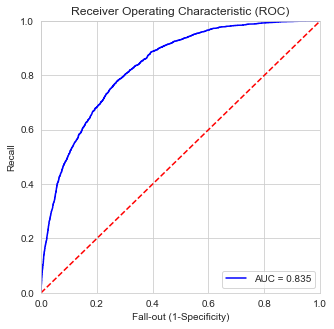

--------------------------------------------------------------------------------------------------------------
CV mean: 0.8364, CV std: 0.0061
Wall time: 8min 9s


In [43]:
%%time


SEED=42

n_fold = 5
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=SEED)

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed': SEED,

         }

test_data = Pool(data=test,
                 cat_features=cat_fet)
scores = []
prediction = np.zeros(test.shape[0])

i=1
for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):

    print("--------------------------------------------------------------------------------------------------------------")
    print('Fold {} of StratifiedKFold {}'.format(i,folds.n_splits))

    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] # train and validation data splits
    y_train, y_valid = y[train_index], y[valid_index]

    train_data = Pool(data=X_train, 
                      label=y_train,
                      cat_features=cat_fet)
    valid_data = Pool(data=X_valid, 
                      label=y_valid,
                      cat_features=cat_fet)

    model = CatBoostClassifier(**params)
    model.fit(train_data,
              eval_set=valid_data, 
              use_best_model=True
             )
    y_predb = model.predict_proba(X_valid)[:,1]
    y_pred=np.where(y_predb>0.5,1,0)

    classification_result(y_valid,y_pred)
    plot_roc_auc_curve(y_valid,y_predb)


    score = model.get_best_score()['validation']['AUC']
    scores.append(score)


    preds = model.predict_proba(test_data)[:,1]
    prediction += preds

    i+=1

    print("--------------------------------------------------------------------------------------------------------------")

prediction /= n_fold
print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))



In [44]:
scores

[0.8439015394340549,
 0.8266268710865212,
 0.8345233511934083,
 0.84179388160414,
 0.8350548728182556]

In [45]:
prediction

array([0.59136752, 0.62291942, 0.17621943, ..., 0.37647759, 0.72776669,
       0.2882701 ])

In [46]:
# final_y=np.where(prediction>0.5,1,0)
submission = pd.DataFrame({"Applicant_ID":test['Applicant_ID'],
    "default_status":prediction})
submission.to_csv("subboot11.csv", index=False)